Generating a basic image with `ufig` can be done by building up a context of the `ivy` workflow engine. Then, at least two plugins need to be called to compute the PSF at each object and render the image.

In [1]:
import ivy
import numpy as np

ctx = ivy.context.create_ctx(
    parameters=ivy.load_configs("ufig.config.common")
)

ctx.parameters.catalog_precision=np.float32
ctx.parameters.size_x = 100
ctx.parameters.size_y = 100

ctx.numgalaxies = 3
ctx.galaxies = ivy.context.create_ctx(
    x=np.array([10, 40, 70]),
    y=np.array([30, 80, 20]),
    nphot=np.array([1e4, 1e5, 1e3]),
    r50=np.array([3, 5, 1]),
    sersic_n=np.array([1, 2, 3]),
    e1=np.array([-0.1, 0.1, 0]),
    e2=np.array([-0.5, 0.3, 0.2]),
    psf_beta=2,
    psf_e1=np.array([0.0, 0.0, 0.0]),
    psf_e2=np.array([0.0, 0.0, 0.0]),
    psf_f1=np.array([0.0, 0.0, 0.0]),
    psf_f2=np.array([0.0, 0.0, 0.0]),
    psf_g1=np.array([0.0, 0.0, 0.0]),
    psf_g2=np.array([0.0, 0.0, 0.0]),
    psf_kurtosis=np.array([0.0, 0.0, 0.0]),
    
)

ctx.image = np.zeros((ctx.parameters.size_x, ctx.parameters.size_y))
ctx.current_filter="i"

In [2]:
from ufig.plugins import render_galaxies_flexion, add_psf

plugin_psf = add_psf.Plugin(ctx)
plugin_psf()

plugin_rendering = render_galaxies_flexion.Plugin(ctx)
plugin_rendering()


24-09-16 15:45:10 add_psf.py INF   Generating PSF with constant_moffat 
24-09-16 15:45:10 render_gal INF   Rendering 3 galaxies 


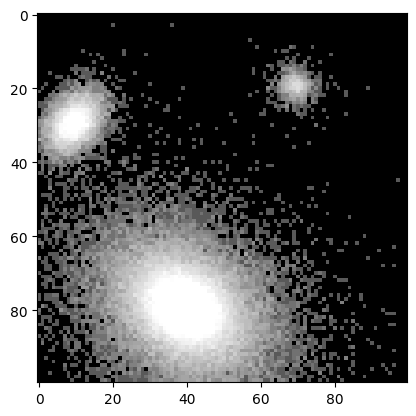

In [3]:
from astropy.io import fits
from astropy.visualization import ImageNormalize, LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import PercentileInterval
import matplotlib.pyplot as plt

interval = PercentileInterval(95)
vmin, vmax = interval.get_limits(ctx.image)
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())

# Plot the first image
plt.imshow(ctx.image, cmap='gray', norm=norm)